In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Super_Store_DA.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.drop(columns='Postal Code',inplace=True)

In [5]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [6]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

     Region        

In [8]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<Axes: xlabel='Region'>

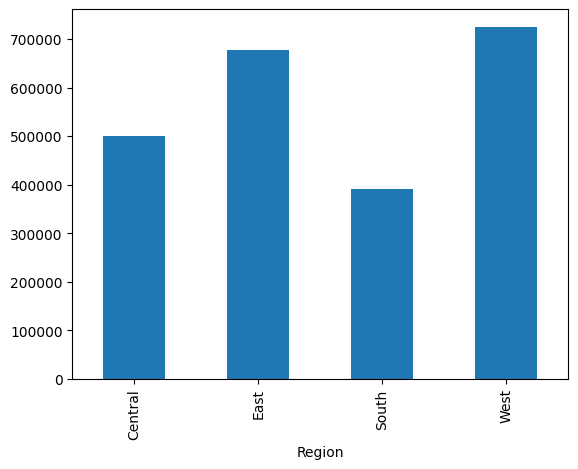

In [9]:
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: ylabel='Sales'>

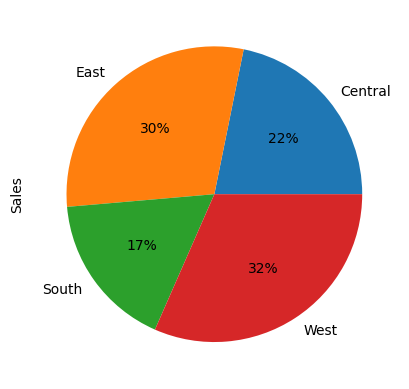

In [10]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Segment'>

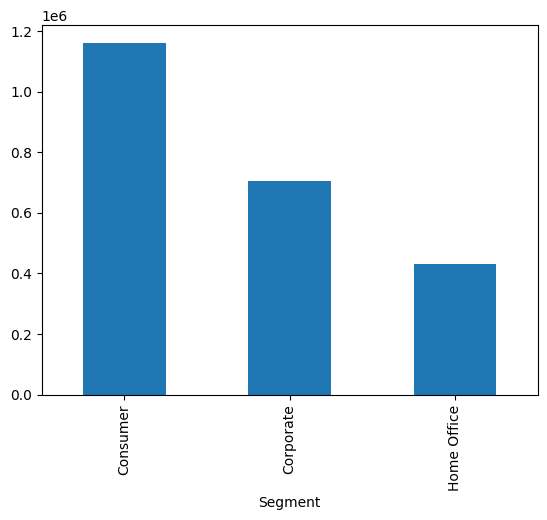

In [11]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<Axes: ylabel='Sales'>

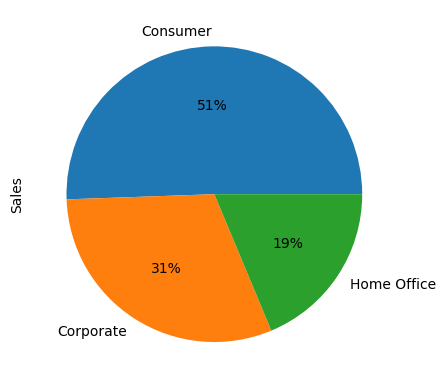

In [12]:
df.groupby("Segment")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Category'>

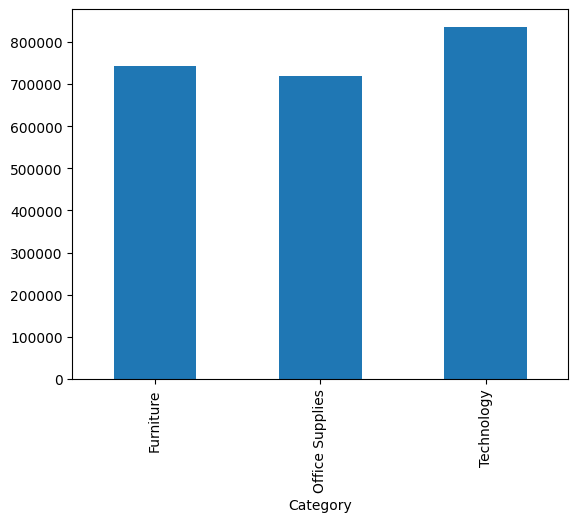

In [13]:

df.groupby("Category")["Sales"].sum().plot.bar()


<Axes: ylabel='Sales'>

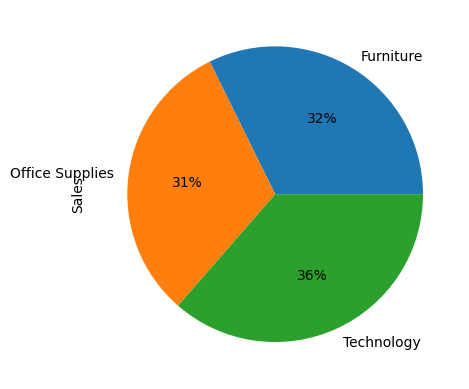

In [14]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='State'>

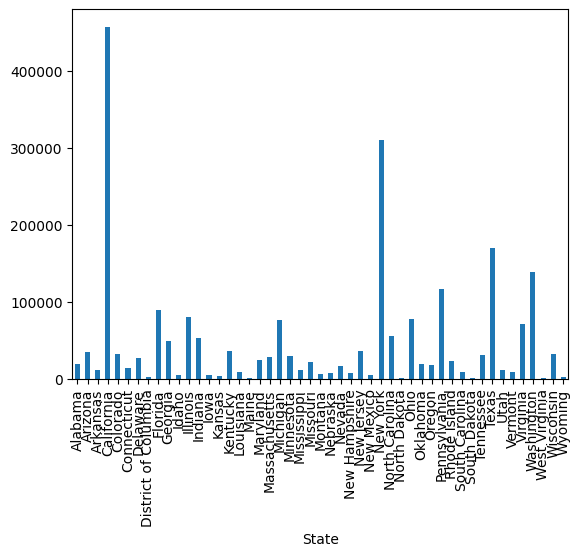

In [15]:
df.groupby("State")["Sales"].sum().plot.bar()

<Axes: xlabel='State'>

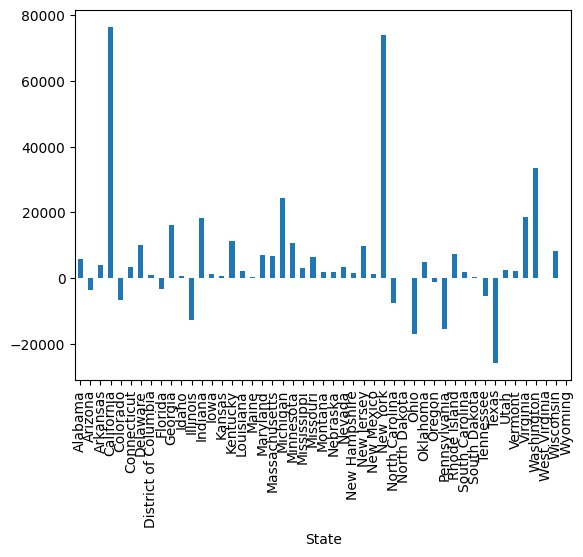

In [16]:
df.groupby("State")["Profit"].sum().plot.bar()

In [17]:
region_sales_profit = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

<Figure size 1000x600 with 0 Axes>

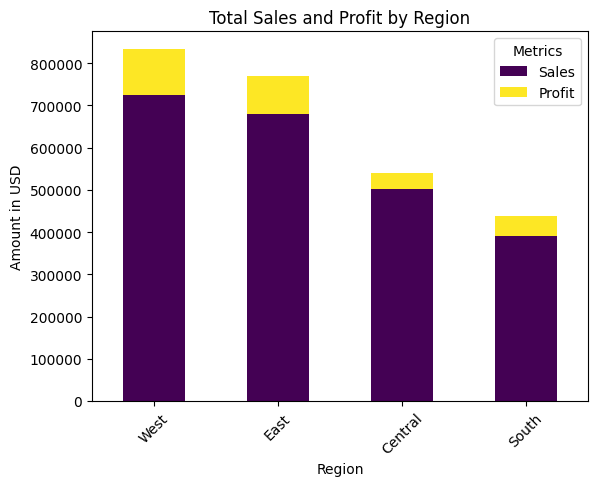

In [18]:
plt.figure(figsize=(10, 6))
region_sales_profit.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Total Sales and Profit by Region")
plt.xlabel("Region")
plt.ylabel("Amount in USD")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

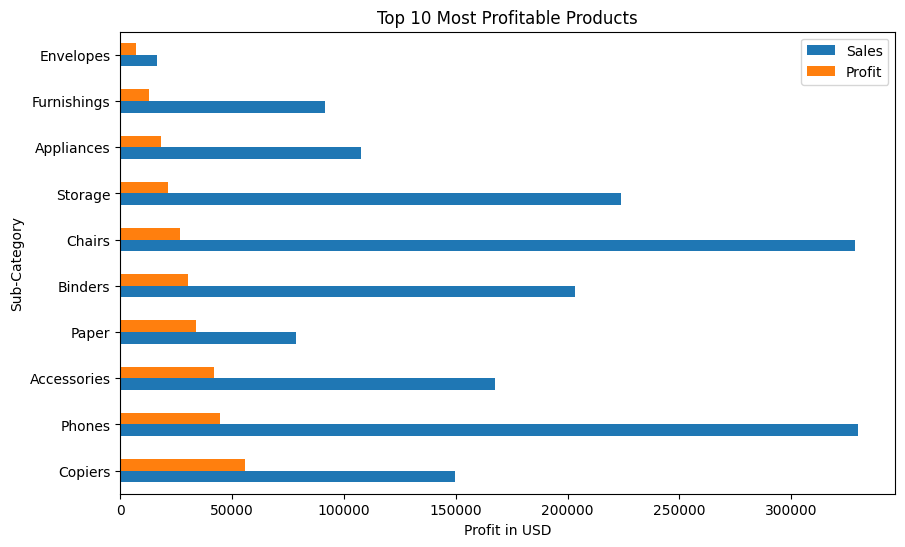

In [19]:
top_products = df.groupby("Sub-Category")[["Sales", "Profit"]].sum().sort_values("Profit", ascending=False)

# Plotting
top_products.head(10).plot(kind="barh", figsize=(10, 6), title="Top 10 Most Profitable Products")
plt.xlabel("Profit in USD")
plt.show()

<Axes: ylabel='Profit'>

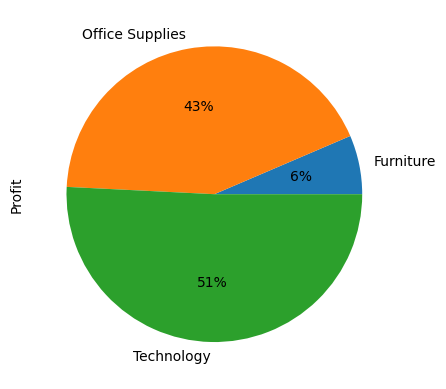

: 

In [25]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

In [21]:
df.sort_values(['Profit','Product Name'],ascending=False).groupby('Profit %').head(5)

KeyError: 'Profit %'

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by Region and Month-Year for monthly sales trend
df['Year-Month'] = df['Order Date'].dt.to_period("M")
monthly_sales = df.groupby(['Year-Month', 'Region'])['Sales'].sum().unstack()

# Plotting sales growth over time by region
monthly_sales.plot(figsize=(12, 6), marker='o')
plt.title("Sales Growth Over Time by Region")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.show()

KeyError: 'Order Date'